In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Hopfield networks and autoassociatiave memory

A Hopfield net is only defined by one parameter, $N_x$, which represents the number of neurons in it contains. 

In [17]:
n_x = 28

### Implementing the network

To implement the network, we need to define an input vector $x$ and a synpatic matrix $w$, as well as specific functions to compute the network's energy and activation. 

In [396]:
x = np.zeros((1, n_x))
w = np.random.random((n_x, n_x))
mask = np.ones((n_x, n_x))
np.fill_diagonal(mask, 0)


def error(p1, p2):
    """Calculates the error function"""
    return 0.5 * np.sum(((p1 - p2) ** 2))


def scalar_binary(input):
    """The binary function (-1, 1)"""
    if input > 0:
        return 1.0
    else:
        return -1.0
    
binary = np.vectorize(scalar_binary)

def propagate():
    """Propagation in a Hopfield field"""
    global x
    inputs = x.dot(w * mask)
    x = binary(inputs)
    return energy()


def energy():
    """Energy function"""
    return np.sum(mask * w * x.T.dot(x)) / -2.0


def set_input(i):
    """Sets the pattern corresponding to a single number as input"""
    global x
    x = pattern(i)

    
def activation(min_diff = 0.01, max_cycles = 1000):
    """Activation function for Hopfield nets"""
    S = []
    i = 1
    previous_x = np.copy(x)
    S.append((x, energy()))
    
    propagate()
    diff = error(previous_x, x)
    
    S.append((x, energy()))
    
    while diff > min_diff and i < max_cycles:
        previous_x = np.copy(x)
        propagate()
        S.append((x, energy()))
        diff = error(previous_x, x)
        i += 1
        
    return S

## Attractor states and network dynamics

[[ 0.32272678  0.52049884  0.78391927  0.18932667  0.29138051  0.28242051
   0.23700165  0.71170301  0.63854971  0.81292189  0.61588057  0.88408224
   0.92338455  0.53464517  0.68600926  0.13624618  0.08024488  0.18069189
   0.72015106  0.00603762  0.80553931  0.52824367  0.52743678  0.76396448
   0.69916265  0.82934135  0.33506721  0.97800472]]


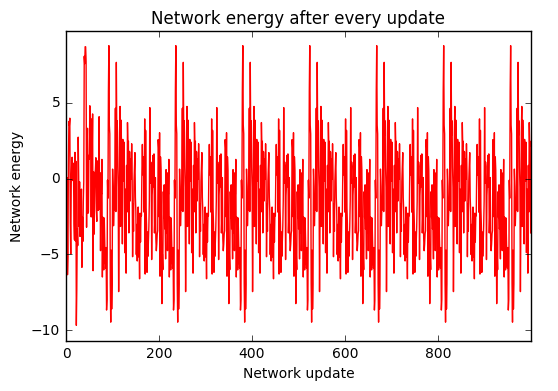

In [420]:
x = np.random.random((1,28)) 
w = np.random.random((28,28)) - 0.5
print(x)
S = activation(max_cycles=1000)

E = [s[1] for s in S[:-1]]
P = [s[0].reshape((7, 4)) for s in S[:-1]]

N = len(S) - 1

plt.plot(E,  "r-")
plt.axis([-0.5, N - 0.5, min(E) - 1, max(E) + 1])
#plt.xticks(range(N), ["%d" % (x + 1) for x in range(N)])
plt.title("Network energy after every update")
plt.xlabel("Network update")
plt.ylabel("Network energy")
plt.show()

#for i in range(N):
#    plt.subplot(2, round(N/2), (i + 1))
#    plt.imshow(P[i], interpolation="kaiser")
#    plt.xticks([0], [""])
#    plt.yticks([0], [""])
#    plt.title("Cycle %s" % i)
#plt.show()


## Learning

Here we will make the network learn. Specifically, we will train the network to store and recognize some of the single digits we have used for the gradiet descent example. First, we need to define the proper functions.

In [405]:
def pattern(i):
    """Loads a matrix representation of a digit and turns it into a binary map"""
    p = np.loadtxt("%d.txt" % i)
    p = (p * 2) - 1  # Makes the vector binary (+1 or -1)
    return p.reshape((n_x, 1)).T
        
    
def learn(patterns):
    """Learn a given set patterns"""
    global w
    N = n_x
    new_w = np.zeros((n_x, n_x))  # New weight matrix
    
    for num in patterns:
        p = pattern(num)
        dw = p.T.dot(p)
        new_w = new_w + (dw/N) 
        
    w = new_w
        
        
def corrupt_pattern(pattern, prob = 0.2):
    """Creates a corrupted version a given pattern (with randomly flipped bits)"""
    r = np.copy(pattern)
    for i in range(r.size):
        if np.random.random() < prob:
            r[0,i] = r[0,i] * -1
    return r


def noisy_pattern(pattern, prob = 0.4):
    """Corrupts a given pattern"""
    r = np.copy(pattern)
    for i in range(r.size):
        if np.random.random() < prob:
            r[0,i] = r[0,i] * np.random.random()
    return r

### Testing learning

With these functions written, we can now test the network by having it memorize a subset of numbers.

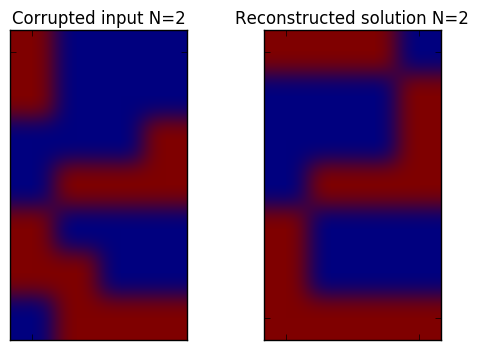

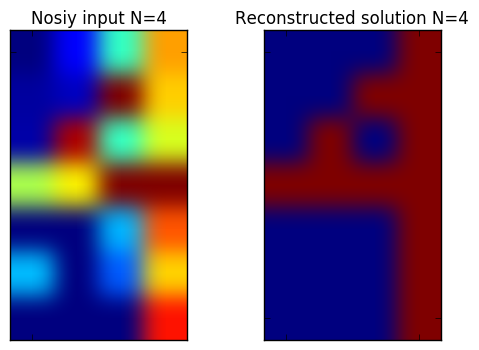

In [406]:
learn([1, 2, 4, 7])

c_input = 2
n_input = 4

plt.subplot(1, 2, 1)
x = corrupt_pattern(pattern(c_input))
plt.title("Corrupted input N=%s" % c_input)
plt.imshow(x.reshape((7,4)), interpolation = "kaiser")
plt.yticks([0], [""])
plt.xticks([0], [""])

activation()

plt.subplot(1, 2, 2)
plt.imshow(x.reshape((7,4)), interpolation = "kaiser")
plt.title("Reconstructed solution N=%s" % c_input)
plt.yticks([0, 6], ["", ""])
plt.xticks([0, 3], ["", ""])
plt.show()

plt.subplot(1, 2, 1)
x = noisy_pattern(pattern(4), prob=0.5)
plt.title("Nosiy input N=%s" % n_input)
plt.imshow(x.reshape((7,4)), interpolation = "kaiser")
plt.yticks([0], [""])
plt.xticks([0], [""])

activation()

plt.subplot(1, 2, 2)
plt.imshow(x.reshape((7,4)), interpolation = "kaiser")
plt.title("Reconstructed solution N=%s" % n_input)
plt.yticks([0, 6], ["", ""])
plt.xticks([0, 3], ["", ""])
plt.show()



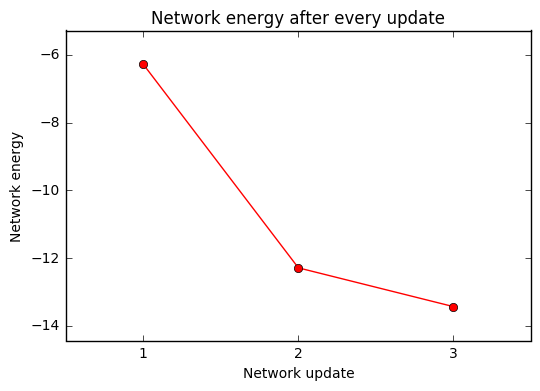

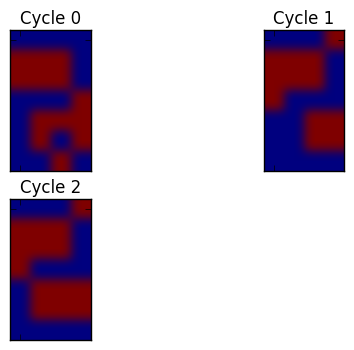

In [409]:
p = corrupt_pattern(pattern(2), prob = 0.8)
x = p
S = activation()

E = [s[1] for s in S[:-1]]
P = [s[0].reshape((7, 4)) for s in S[:-1]]

N = len(S) - 1

plt.plot(E,  "ro-")
plt.axis([-0.5, N - 0.5, min(E) - 1, max(E) + 1])
plt.xticks(range(N), ["%d" % (x + 1) for x in range(N)])
plt.title("Network energy after every update")
plt.xlabel("Network update")
plt.ylabel("Network energy")
plt.show()

for i in range(N):
    plt.subplot(2, round(N/2), (i + 1))
    plt.imshow(P[i], interpolation="kaiser")
    plt.xticks([0], [""])
    plt.yticks([0], [""])
    plt.title("Cycle %s" % i)
plt.show()
